# Group Project 2

## Situtation

This project will use the data included in the `nycflights13` package.

Again, suppose you work for United Airlines (carrier code UA). After having previously studied departure delays, you will now be investigating **gain_per_flight**

- This is, how much quicker the flight ended up being than planned.

- We can find the net gain by subtracting the arrival delay from the departure delay. Create a new variable to measure the net gain!!

  - `net_gain` = `dep_delay` - `arr_delay`

Prepare a report that **utilizes confidence intervals and hypothesis tests**, alongside appropriate exploratory data analysis, to analyze flight gains. <br>
You can choose where you want to use confidence intervals and where you want to use hypothesis tests, but one or the other should be used to address each question.

## Questions to Address

1. Does the average gain differ for flights that departed late versus those that did not? What about for flights that departed more than 30 minutes late?

2. What are the five most common destination airports for United Airlines flights from New York City? Describe the distribution and the average gain for each of these five airports.

3. Another common measure of interest, in addition to total gain, is the gain relative to the duration of the flight. Calculate the gain per hour by dividing the total gain by the duration in hours of each flight. Does the average gain per hour differ for flights that departed late versus those that did not? What about for flights that departed more than 30 minutes late?

4. Does the average gain per hour differ for longer flights versus shorter flights?

## Approach / Technique

### 1. Does the average gain differ for flights that departed late versus those that did not? What about for flights that departed more than 30 minutes late?
Edwin

#### Approach

**p.1) Does the average gain differ for flights that departed late versus those that did not?**
- **Hypothesis Tests**, to formally capture the means

  - Null Hypothesis, Ho: `avg_gain_late` = `avg_gain_on_time`
  
  - Alt Hypothsis, Ha: `avg_gain_late` != `avg_gain_on_time`

- **Confidence Intervals**, Prob CI for the difference in means to quantify the magnotide.

  - example: "A 95% CI for the difference in means"


**p.2) Does the average gain differ for flights that departed late versus those that departed more than 30 mins late (very late)?**

- Null Hypothesis, Ho: `avg_gain_very_late` = `avg_gain_late`
  
- Alt Hypothsis, Ha: `avg_gain_very_late` != `avg_gain_late`

#### Variables + Equations Needed

- Measured in Gain:
  - net_gain
  - gain_per_hour


### 2. What are the five most common destination airports for United Airlines flights from New York City? Describe the distribution and the average gain for each of these five airports.
Prince

#### Approach

**p1) What are the five most common destination airports for United Airlines flights from New York City?**

  - For each airport: display the count of flight tha have an ORIGIN=NYC

**p2) Describe the distribution and the average gain for each of these five airports.**

  - Display a table and histogram showing the average gain for each Airport.
  - Display a Boxplot or Historgram showing 5 Number Summary for each Airport's
  - Write a summary


#### Variables Needed
- dest
- net_gain

### 3. Does the average gain per hour differ for flights that departed late versus those that did not? What about for flights that departed more than 30 minutes late?
BB

**p1) Does the average gain per hour differ for flights that departed late versus those that did not?**

- Hypothesis Tests, to formally capture the means

  - Null Hypothesis, Ho: `avg_gph_late` = `avg_gph_on_time`

  - Alt Hypothsis, Ha: `avg_gph_late`!= `avg_gph_on_time`

- Confidence Intervals, Prob CI for the difference in means to quantify the magnotide.

  - example: "A 95% CI for the difference in means"

**p2) Does the average gain per hour differ for flights that departed late versus those that departed more than 30 minutes late?**

  - Null Hypothesis, Ho: `avg_gph_late`= `avg_gph_very_late`

  - Alt Hypothsis, Ha: `avg_gph_late`!= `avg_gph_very_late`

### 4. Does the average gain per hour differ for longer flights versus shorter flights?
Alyssa

**Does the average gain per hour differ for longer flights vs shorter flights?**

- Find the Median gain_per_hour time for all flights

- Display the Filtered:

  - long flights GPH ... for flights >= than median time
  - shorter flights GPH... for flights < than median time

- Hypothesis Tests, to formally capture the means

  - Null Hypothesis, Ho: `avg_gph_long` = `avg_gph_short`

  - Alt Hypothsis, Ha: `avg_gph_long` != `avg_gph_short`
<br>

- Perofrm a **Confidence Intervals**, Prob CI for the difference in means to quantify the magnotide.

  - example: "A 95% CI for the difference in means"

## Data Preparation
Edwin


#### To Import the required libraries

In [ ]:
install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("nycflights13")
library("dplyr")
library("ggplot2")

#### To import `Flight` and `Airport` dataset


In [ ]:
flights <- nycflights13::flights
airports <- nycflights13::airports


In [ ]:
print(head(flights))
print(head(airports))

# A tibble: 6 × 19
   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1  2013     1     1      517            515         2      830            819
2  2013     1     1      533            529         4      850            830
3  2013     1     1      542            540         2      923            850
4  2013     1     1      544            545        -1     1004           1022
5  2013     1     1      554            600        -6      812            837
6  2013     1     1      554            558        -4      740            728
# ℹ 11 more variables: arr_delay <dbl>, carrier <chr>, flight <int>,
#   tailnum <chr>, origin <chr>, dest <chr>, air_time <dbl>, distance <dbl>,
#   hour <dbl>, minute <dbl>, time_hour <dttm>
# A tibble: 6 × 8
  faa   name                             lat   lon   alt    tz dst   tzone      
  <chr> <chr>                          <dbl> <dbl> <dbl> <dbl> <c

## Data Cleaning

#### To clean data, we need to determine the variables with null values and handle this NaN values.

In [ ]:
colSums(is.na(flights))

year          month            day       dep_time sched_dep_time 
             0              0              0           8255              0 
     dep_delay       arr_time sched_arr_time      arr_delay        carrier 
          8255           8713              0           9430              0 
        flight        tailnum         origin           dest       air_time 
             0           2512              0              0           9430 
      distance           hour         minute      time_hour 
             0              0              0              0

In [ ]:
colSums(is.na(airports))

faa  name   lat   lon   alt    tz   dst tzone 
    0     0     0     0     0     0     0     3

The NaN values are likely as a result of cancelled flights, hence they will be removed.

#### To filter the flights dataset to only include **United Airline** Flights and also filter out NaN values.

In [ ]:
ua_flights <- flights %>%
  filter(carrier == "UA") %>%
  filter(!is.na(dep_delay),
         !is.na(arr_delay),
         !is.na(air_time))

#### Creating new variable `net_gain` that calculates the difference between departure delay and arrival delay.

In [ ]:
ua_flights <- ua_flights %>%
  mutate(net_gain = dep_delay - arr_delay)

In [ ]:
head(ua_flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,net_gain
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,-9
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,-16
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,-16
2013,1,1,558,600,-2,924,917,7,UA,194,N29129,JFK,LAX,345,2475,6,0,2013-01-01 06:00:00,-9
2013,1,1,558,600,-2,923,937,-14,UA,1124,N53441,EWR,SFO,361,2565,6,0,2013-01-01 06:00:00,12
2013,1,1,559,600,-1,854,902,-8,UA,1187,N76515,EWR,LAS,337,2227,6,0,2013-01-01 06:00:00,7


#### To verify what measurements the columns are using

In [ ]:
?flights

Warning message in fetch(key):
“internal error 1 in R_decompress1 with libdeflate”
ERROR while rich displaying an object: Error in fetch(key): lazy-load database '/usr/local/lib/R/site-library/nycflights13/help/nycflights13.rdb' is corrupt

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <-

The variables that are being considered such as `arr_delay`, `dep_delay`, `air_time`(time spent in the air) are all in **minutes**. Since they are recorded in minutes, `gain_per_hour` needs to be converted to hour.

#### To create new column `gain_per_hour`

In [ ]:
ua_flights <- ua_flights %>%
    mutate(gain_per_hour = net_gain / (air_time / 60))

In [ ]:
head(ua_flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,net_gain,gain_per_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,⋯,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,-9,-2.378855
2013,1,1,533,529,4,850,830,20,UA,⋯,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,-16,-4.229075
2013,1,1,554,558,-4,740,728,12,UA,⋯,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,-16,-6.400000
2013,1,1,558,600,-2,924,917,7,UA,⋯,N29129,JFK,LAX,345,2475,6,0,2013-01-01 06:00:00,-9,-1.565217
2013,1,1,558,600,-2,923,937,-14,UA,⋯,N53441,EWR,SFO,361,2565,6,0,2013-01-01 06:00:00,12,1.994460
2013,1,1,559,600,-1,854,902,-8,UA,⋯,N76515,EWR,LAS,337,2227,6,0,2013-01-01 06:00:00,7,1.246291


#### Create column for the flights that departed late, `departed_late`, those that departed more than 30 minutes late, `departed_verylate`, and those that departed on-time, `departed_ontime`. Also created a column to show short and long flights `long_flights`.


In [ ]:
# Create column for the flights that departed late and those that departed more than 30 mins late.
#uses ifelse function to create new columns
ua_flights<- ua_flights %>%
    mutate(departed_late = ifelse(dep_delay > 0, 1, 0),
           departed_verylate = ifelse(dep_delay > 30, 1, 0),
           departed_ontime = ifelse(dep_delay <= 0, 1, 0),
            long_flights = ifelse(air_time>=median(air_time, na.rm=TRUE),1,0) #DEFINE LONG FLIGHT COLUMN USING MEDIAN AIRTIME AS THHRESHOLD
           )
head(ua_flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,distance,hour,minute,time_hour,net_gain,gain_per_hour,departed_late,departed_verylate,departed_ontime,long_flights
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,⋯,1400,5,15,2013-01-01 05:00:00,-9,-2.378855,1,0,0,1
2013,1,1,533,529,4,850,830,20,UA,⋯,1416,5,29,2013-01-01 05:00:00,-16,-4.229075,1,0,0,1
2013,1,1,554,558,-4,740,728,12,UA,⋯,719,5,58,2013-01-01 05:00:00,-16,-6.400000,0,0,1,0
2013,1,1,558,600,-2,924,917,7,UA,⋯,2475,6,0,2013-01-01 06:00:00,-9,-1.565217,0,0,1,1
2013,1,1,558,600,-2,923,937,-14,UA,⋯,2565,6,0,2013-01-01 06:00:00,12,1.994460,0,0,1,1
2013,1,1,559,600,-1,854,902,-8,UA,⋯,2227,6,0,2013-01-01 06:00:00,7,1.246291,0,0,1,1


### Merge `airports` and `flights` DF together

To merge the Airport and Flights datasets using `dest` and `faa` columns as the key.




In [ ]:
ua_flights_merged <- ua_flights %>%
    left_join(airports, by = c("dest" = "faa"))

In [ ]:
head(ua_flights_merged)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,departed_verylate,departed_ontime,long_flights,name,lat,lon,alt,tz,dst,tzone
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2013,1,1,517,515,2,830,819,11,UA,⋯,0,0,1,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago
2013,1,1,533,529,4,850,830,20,UA,⋯,0,0,1,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago
2013,1,1,554,558,-4,740,728,12,UA,⋯,0,1,0,Chicago Ohare Intl,41.97860,-87.90484,668,-6,A,America/Chicago
2013,1,1,558,600,-2,924,917,7,UA,⋯,0,1,1,Los Angeles Intl,33.94254,-118.40807,126,-8,A,America/Los_Angeles
2013,1,1,558,600,-2,923,937,-14,UA,⋯,0,1,1,San Francisco Intl,37.61897,-122.37489,13,-8,A,America/Los_Angeles
2013,1,1,559,600,-1,854,902,-8,UA,⋯,0,1,1,Mc Carran Intl,36.08006,-115.15225,2141,-8,A,America/Los_Angeles


In [ ]:
ua_flights_merged %>%
  filter(carrier == "UA") %>%
  select(origin, dest, net_gain, departed_late, departed_verylate)

origin,dest,net_gain,departed_late,departed_verylate
<chr>,<chr>,<dbl>,<dbl>,<dbl>
EWR,IAH,-9,1,0
LGA,IAH,-16,1,0
EWR,ORD,-16,0,0
JFK,LAX,-9,0,0
EWR,SFO,12,0,0
EWR,LAS,7,0,0
EWR,MIA,17,0,0
JFK,SFO,-3,1,0
LGA,IAH,-5,0,0


## Answering Q1

Peforming quick analysis on data

In [ ]:
ua_flights_merged  %>%
    group_by(departed_late) %>%
    summarise(mean(net_gain, na.rm=TRUE),
    median(net_gain, na.rm=TRUE)
    )

departed_late,"mean(net_gain, na.rm = TRUE)","median(net_gain, na.rm = TRUE)"
<dbl>,<dbl>,<dbl>
0,9.269172,11
1,7.543115,10


The figure above compares the average and median net gain for flights that departed late versus those that departed on time. Flights that did not depart late exhibit slightly higher mean and median net gain values, indicating that they typically recover more time while airborne compared to flights that start out delayed.

Creating Boxplpots to analyze distribution of net gains

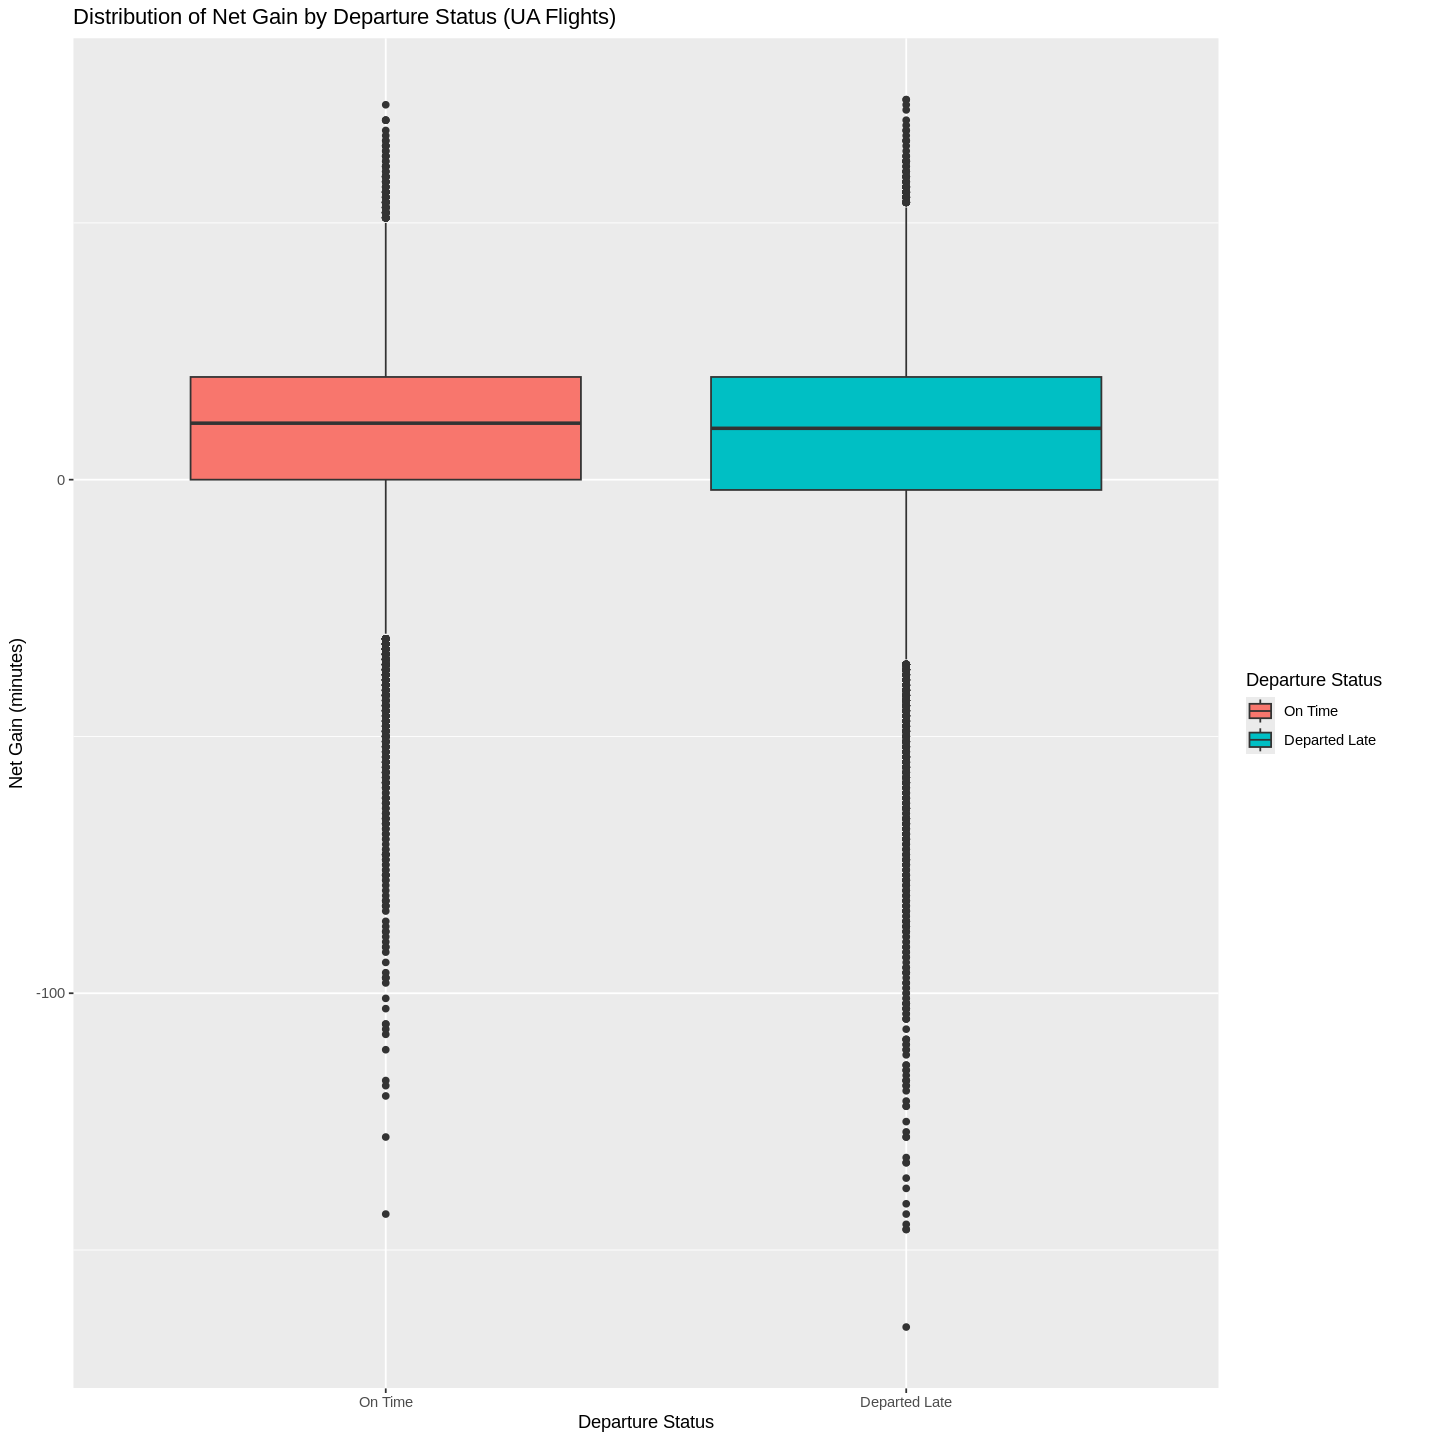

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 12)
ggplot(data = ua_flights_merged,
       aes(x = factor(departed_late),
           y = net_gain,
           fill = factor(departed_late))) +
  geom_boxplot() +
  scale_x_discrete(
    labels = c("0" = "On Time", "1" = "Departed Late")
  ) +
  scale_fill_discrete(
    name = "Departure Status",
    labels = c("On Time", "Departed Late")
  ) +
  labs(
    title = "Distribution of Net Gain by Departure Status (UA Flights)",
    x = "Departure Status",
    y = "Net Gain (minutes)"
  )

The figure displays the distribution of net gain, measured as departure delay minus arrival delay, for UA flights grouped by whether they departed late. The median net gain was slightly higher for on-time departures (approximately 11 minutes) than for late departures (approximately 10 minutes), indicating that flights leaving on time generally recover more time in the air.

The spread of net gain is similar for both groups, with a large number of extreme negative outliers in each category. These outliers represent flights that lost substantial time while airborne rather than catching up. Overall, the distributions overlap heavily, suggesting only modest practical differences in typical time recovery between the groups.

To filter the flights by those that departed late and those that did not depart late

In [ ]:
 late_flights <- ua_flights_merged %>%
    filter(departed_late == 1)

ontime_flights <- ua_flights_merged %>%
    filter(departed_late==0)

#### Conducting Hypothesis Testing - Part 1


**H₀:** μ₁ = μ₂  
**H₁:** μ₁ ≠ μ₂

where:
* μ₁ - mean net gain for flights that departed late
* μ₂  - mean net gain for flights that did not depart late

In [ ]:
# Filter dataset into two groups
late_flights <- ua_flights %>% filter(departed_late == 1)
ontime_flights <- ua_flights %>% filter(departed_late == 0)

# T-test for net gain
t.test(late_flights$net_gain, ontime_flights$net_gain,
       alternative = "two.sided",
       var.equal = FALSE)



	Welch Two Sample t-test

data:  late_flights$net_gain and ontime_flights$net_gain
t = -10.749, df = 52833, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.040805 -1.411308
sample estimates:
mean of x mean of y 
 7.543115  9.269172 


We compared the mean net gain(depature delay minus arrival delay) for UA flights that departed late vs those that departed on time.

Flights that departed late gained on average 7.54 minutes while those that did not depart late(departed on time) gained 9.269 minutes.This implies that flights that depart late recover less time that flights that depart on time.

There's a 95% confidence that the difference between mean lies between -2.041 and -1.411.

Becuase the p-value is extremely small (<0.001) we reject H0.
There is no strong statistical evidence that the average net gain differs between flights that departed late versus those that did not.
We can conclude that Flights that departed late had significantly lower average net gain (by about 1.4–2 minutes) compared to flights that departed on time (p <.0001).


#### Conducting Hypothesis Testing - PART 2

Creating Boxplot to analyze the distribution of net gain between flights that were very late vs those that were not.

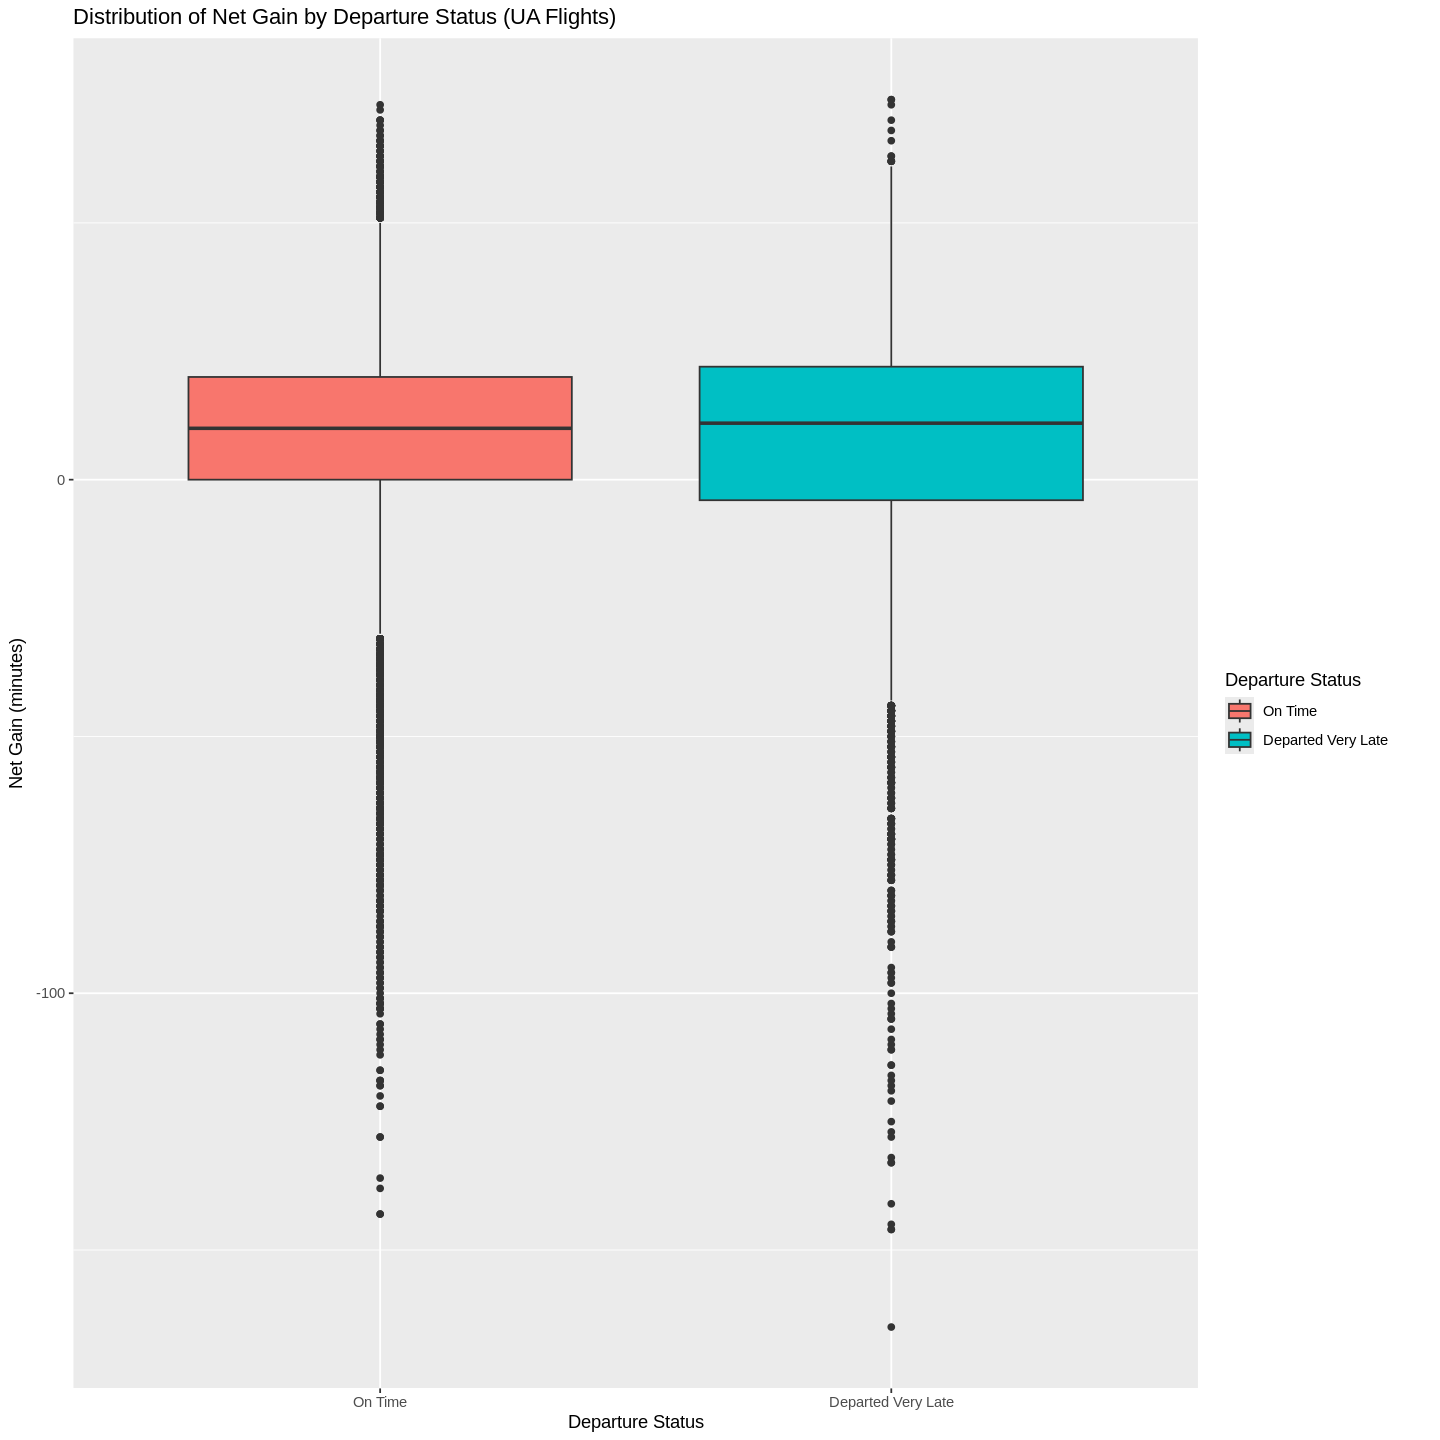

In [ ]:
ggplot(data = ua_flights_merged,
       aes(x = factor(departed_verylate),
           y = net_gain,
           fill = factor(departed_verylate))) +
  geom_boxplot() +
  scale_x_discrete(
    labels = c("0" = "On Time", "1" = "Departed Very Late")
  ) +
  scale_fill_discrete(
    name = "Departure Status",
    labels = c("On Time", "Departed Very Late")
  ) +
  labs(
    title = "Distribution of Net Gain by Departure Status (UA Flights)",
    x = "Departure Status",
    y = "Net Gain (minutes)"
  )

The plot illustrates the distribution of net gain, measured as departure delay minus arrival delay, for UA flights grouped by whether they departed very late (more than 30 minutes late) or on time. The median net gain was slightly higher for flights that departed very late compared with flights that departed on time, suggesting that flights running significantly behind schedule may recover marginally more time while airborne.

Both groups show a similar overall spread, with a substantial number of extreme negative outliers. These outliers represent flights that lost considerable time in the air rather than gaining time. Although the central tendencies of the two groups differ slightly, the wide overlap in distributions indicates that the practical difference in time recovery is modest.

**H₀:** μ₁ = μ₂  
**H₁:** μ₁ ≠ μ₂

where:
* μ₁ - mean net gain for flights that departed very late(>30 mins)
* μ₂  - mean net gain for flights that did not depart very late(<=30 mins)

Perform Hypothesis Testing

In [ ]:
verylate_flights <- ua_flights %>% filter(departed_verylate == 1)
not_verylate <- ua_flights %>% filter(departed_verylate == 0)

t.test(verylate_flights$net_gain, not_verylate$net_gain,
       alternative = "two.sided",
       var.equal = FALSE)


	Welch Two Sample t-test

data:  verylate_flights$net_gain and not_verylate$net_gain
t = -6.2953, df = 8838.6, p-value = 3.215e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.415112 -1.268195
sample estimates:
mean of x mean of y 
 6.857881  8.699534 


We compared the mean net gain(depature delay minus arrival delay) for UA flights that departed late vs those that departed on time.

Flights that departed late gained on average 6.86 minutes while those that did not depart very late gained 8.69 minutes.

There's a 95% confidence that the difference between mean of net gain lies between -2.415 and -1.268. This implies that flights that depart very late recover less time that flights that don't depart very late.

## Answering Q2

**Most common destination airports for UA flights from NYC**

In [ ]:
# count of UA flights with ORIGIN=NYC
by_origin <- ua_flights_merged %>%
  group_by(origin) %>%
  summarize(count = n())
by_origin

origin,count
<chr>,<int>
EWR,45501
JFK,4478
LGA,7803


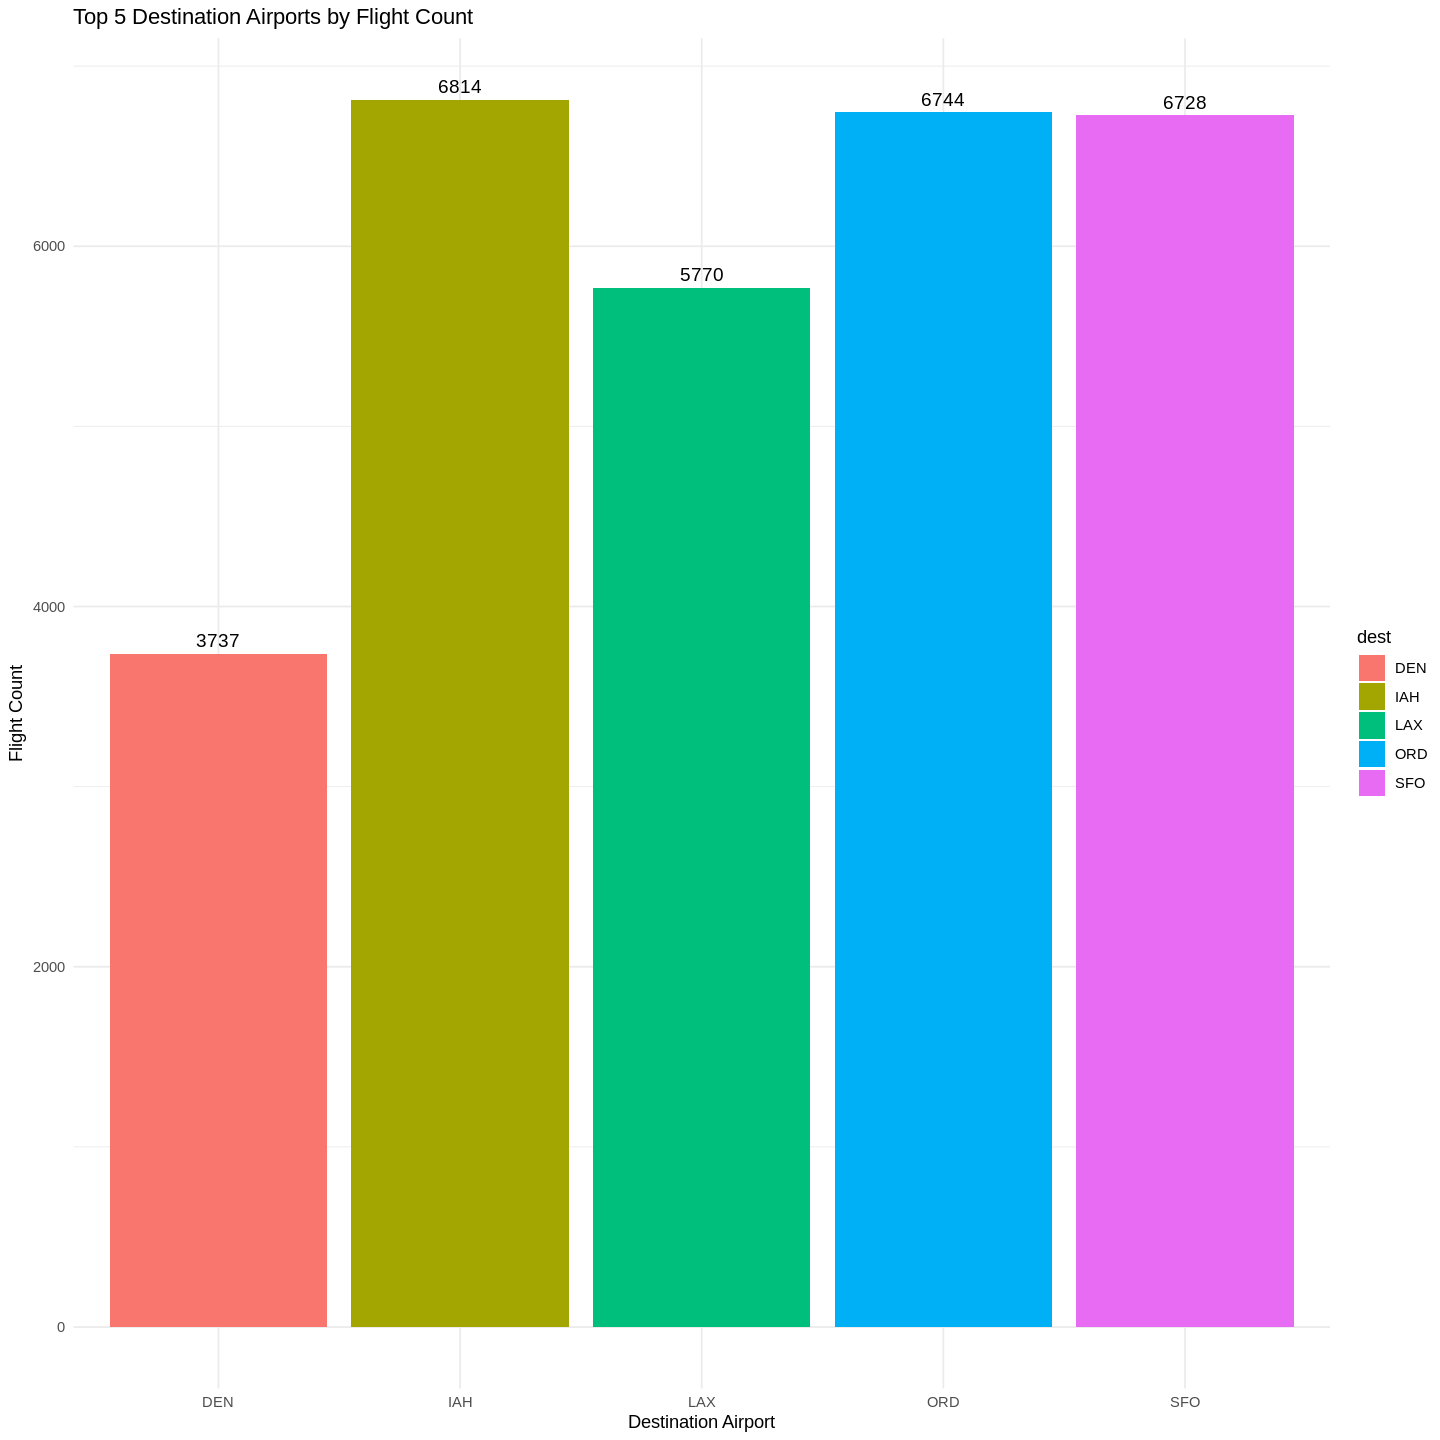

In [ ]:
# Top 5 destination airports and their flight counts
top_destinations <- ua_flights_merged %>%
  count(dest, name = "count") %>%
  arrange(desc(count)) %>%
  slice_head(n = 5)

# Bar chart of top 5 destinations
ggplot(top_destinations, aes(x = dest, y = count, fill = dest)) +
  geom_col() +
  geom_text(aes(label = count), vjust = -0.5, size = 4) +
  labs(
    title = "Top 5 Destination Airports by Flight Count",
    x = "Destination Airport",
    y = "Flight Count"
  ) +
  theme_minimal()

**Summary: Most Common Destination Airports**

The five most common destination airports for United Airlines flights originating from New York City (NYC) are, in order of flight count:


1. IAH (Houston George Bush Intercontinental): 6,814 flights

2. ORD (Chicago O'Hare International): 6,744 flights

3. SFO (San Francisco International): 6,728 flights

4. LAX (Los Angeles International): 5,770 flights

5. DEN (Denver International): 3,737 flights

The data shows a strong concentration of flights to major airport hubs across the United States, with a relatively small difference in flight count among the top three destinations (IAH, ORD, and SFO).

**Average gain (per minute) for top 5 destination airports**

In [ ]:
average_gain_table <- ua_flights_merged %>%
  filter(dest %in% top_destinations$dest) %>%
  group_by(dest) %>%
  summarize(average_gain_minutes = mean(net_gain, na.rm = TRUE))

**Counts per minute**

In [ ]:
average_gain_table

dest,average_gain_minutes
<chr>,<dbl>
DEN,7.302382
IAH,6.861755
LAX,7.825303
ORD,7.777432
SFO,8.695006


**Bar Plot Distribution for average gain per minute**

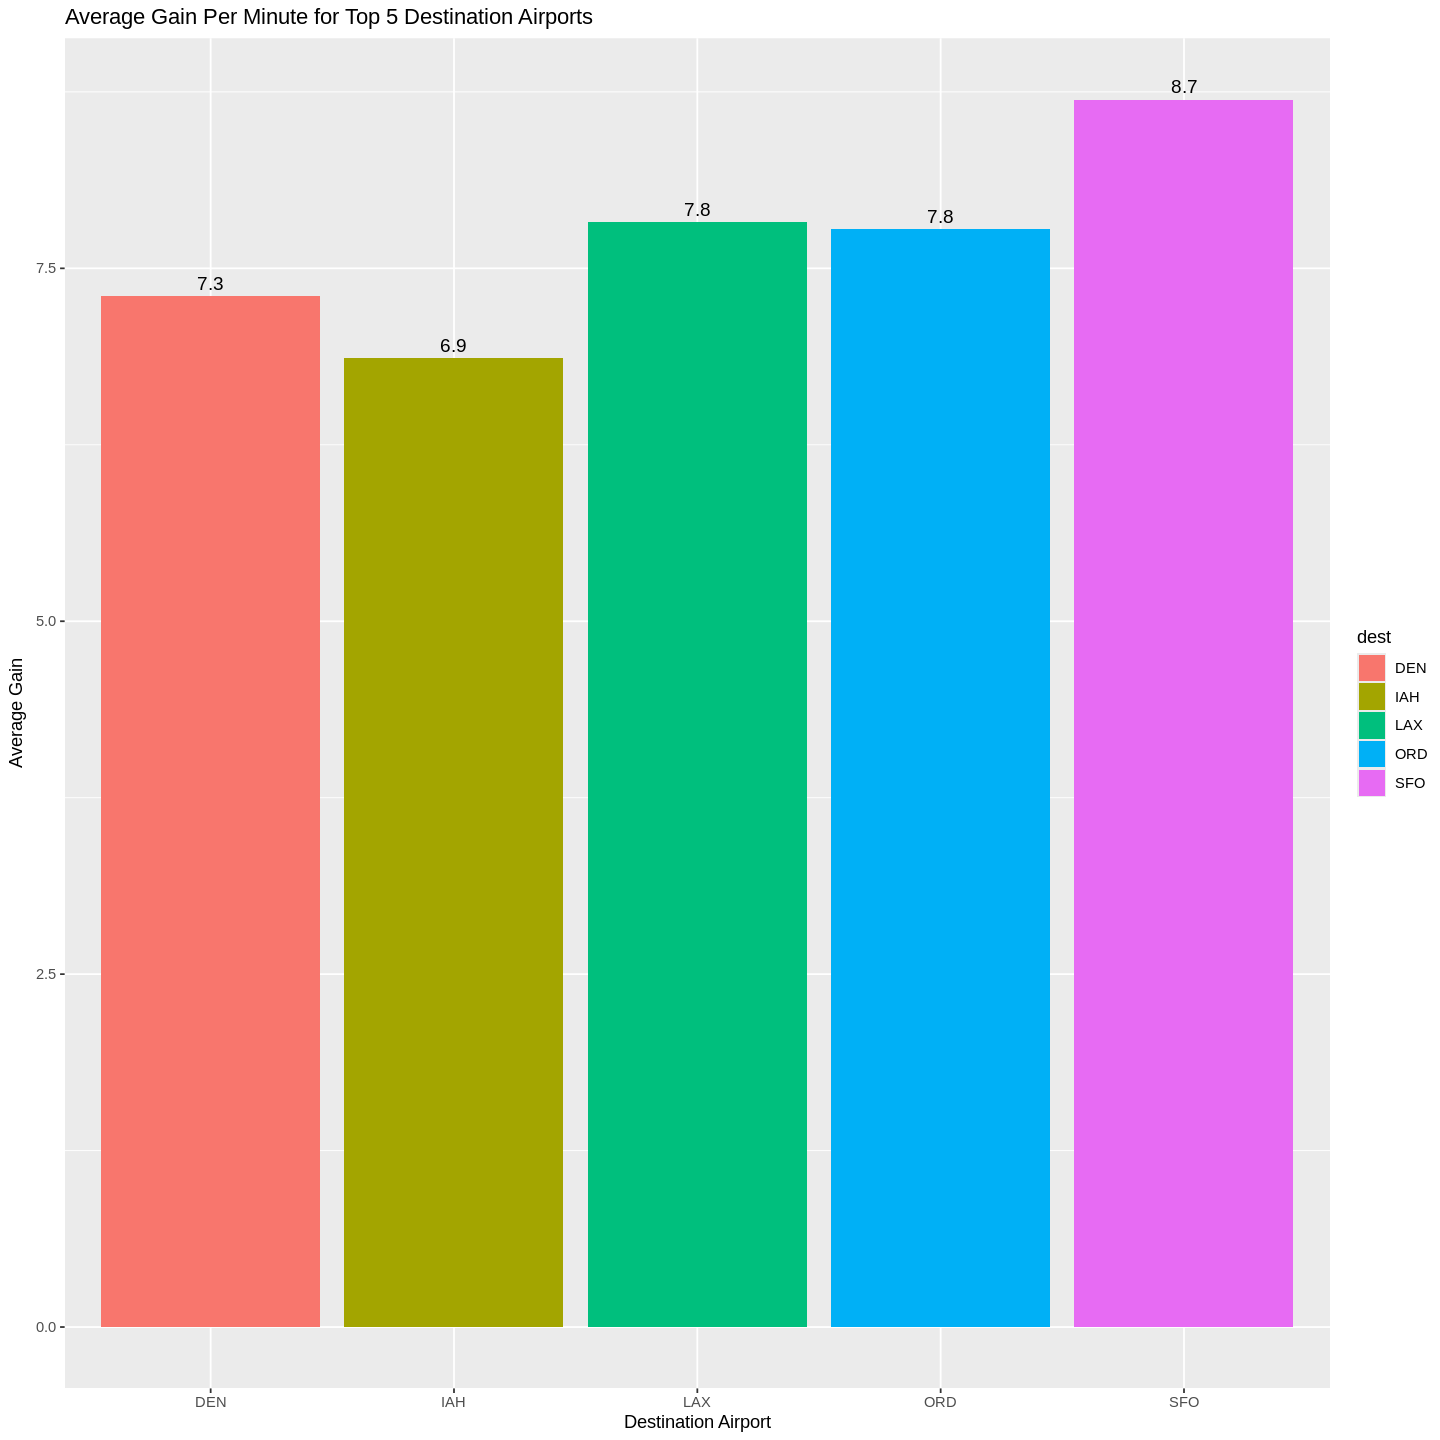

In [ ]:
# Bar plot
ggplot(average_gain_table, aes(x = dest, y = average_gain_minutes, fill = dest)) +
  geom_col() +
  geom_text(aes(label = round(average_gain_minutes, 1)), vjust = -0.5, size = 4) +
  labs(
    title = "Average Gain Per Minute for Top 5 Destination Airports",
    x = "Destination Airport",
    y = "Average Gain"
  )

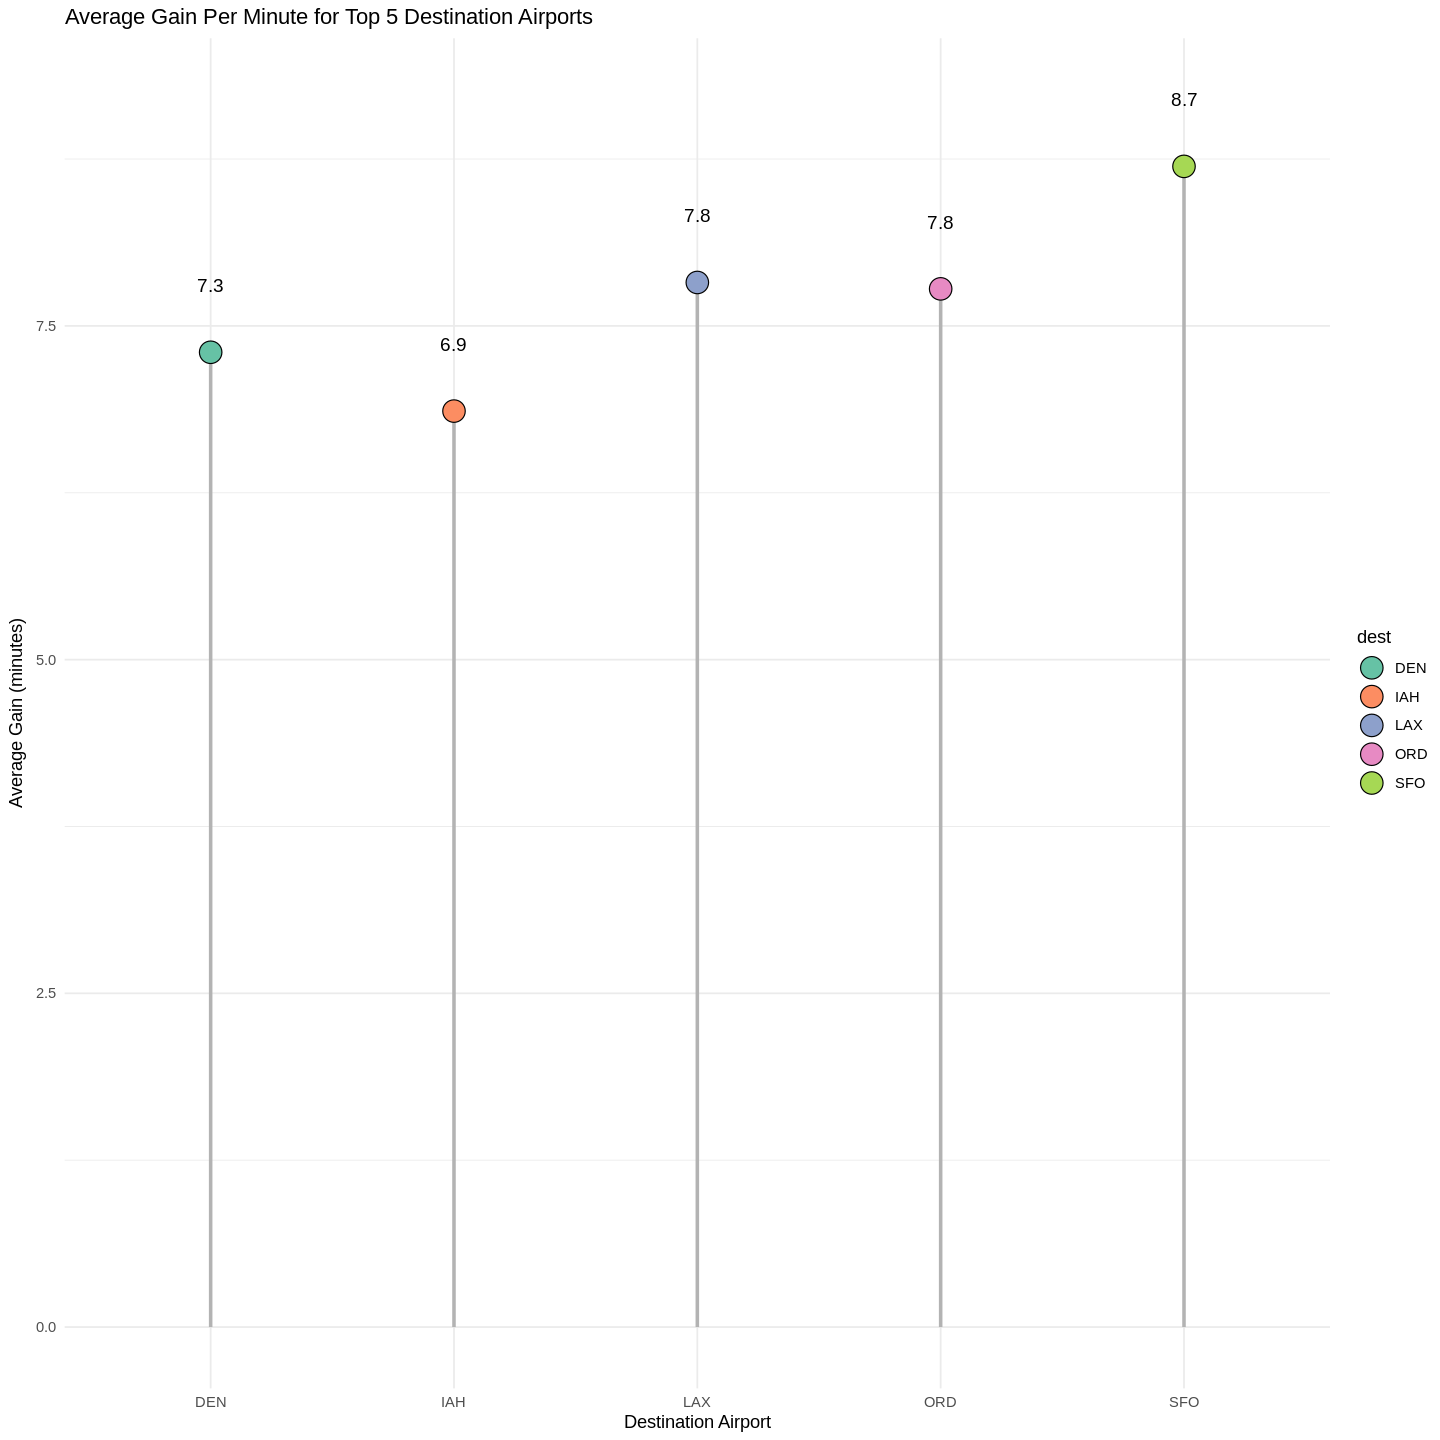

In [ ]:
ggplot(average_gain_table, aes(x = dest, y = average_gain_minutes)) +
  geom_segment(aes(x = dest, xend = dest,
                   y = 0, yend = average_gain_minutes),
               linewidth = 1, color = "gray70") +
  geom_point(aes(fill = dest), shape = 21, size = 6, color = "black") +
  geom_text(aes(label = round(average_gain_minutes, 1),
                y = average_gain_minutes + 0.5),  # ← add vertical offset
            size = 4) +
  labs(
    title = "Average Gain Per Minute for Top 5 Destination Airports",
    x = "Destination Airport",
    y = "Average Gain (minutes)"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")


**Analysis of Average Gain Bar Chart distribution**

The "net gain" is calculated as Departure Delay minus Arrival Delay. A positive value means the flight made up time en route, recovering part of its initial delay.

- All five destination airports show a positive average net gain, meaning that on average, United Airlines flights from NYC to these locations are making up time while airborne.

- SFO (San Francisco) demonstrates the highest average time recovery at approximately 8.70 minutes. This suggests the SFO route is the most efficient at compensating for ground delays.

- IAH (Houston) shows the lowest average time recovery at approximately 6.86 minutes among the top five.

**Box Plot distribution**

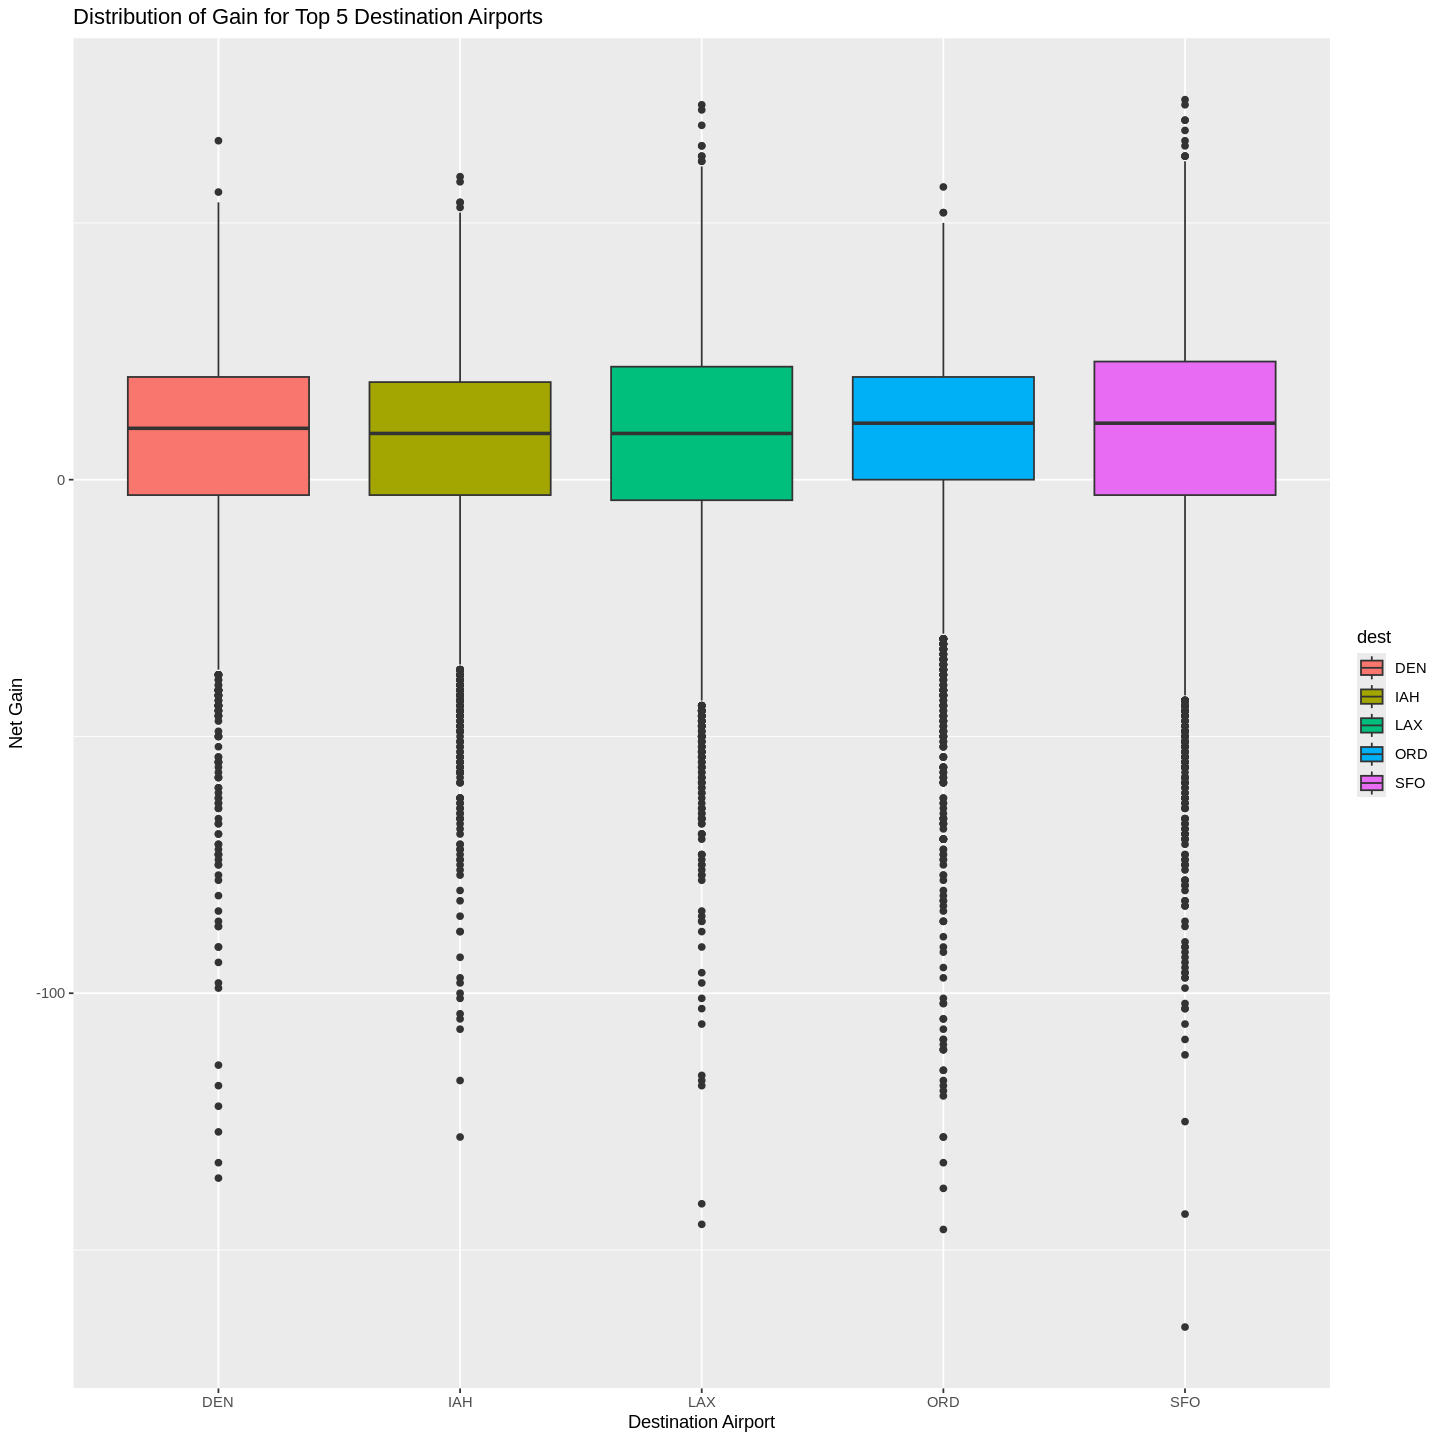

In [ ]:
ggplot(
  ua_flights_merged %>% filter(dest %in% top_destinations$dest),
  aes(x = dest, y = net_gain, fill = dest)
) +
  geom_boxplot() +
  labs(
    title = "Distribution of Gain for Top 5 Destination Airports",
    x = "Destination Airport",
    y = "Net Gain"
  )


**Box Plot Distribution Summary**

The box plot shows that median net gains for all five airports are near zero, indicating most flights make up only a small amount of time or lose little in the air. The middle 50% of flights are tightly centered around zero, reflecting generally minimal deviations from scheduled block time. Distributions are negatively skewed, with more extreme early arrivals than delays, though positive outliers exist. Overall, the shape and spread are consistent across all destinations.

**Analysis for each airport destination**

**IAH (Houston George Bush Intercontinental)**
6,814 flights. Average recovery of 6.9 minutes, the lowest among the top five. The distribution is tight, indicating generally consistent in-air performance, though a cluster of flights experience minor losses.

**ORD (Chicago O'Hare International)**
6,744 flights. Average gain of 7.8 minutes. The distribution is centered near zero, reflecting consistent performance with occasional extreme recoveries and losses.

**SFO (San Francisco International)**
6,728 flights. Highest average gain at 8.7 minutes. Distribution is skewed toward positive gains, with most flights showing small recoveries and some extreme time-making flights, indicating efficient time recovery.

**LAX (Los Angeles International)**
5,770 flights. Average gain of 7.8 minutes. Distribution resembles SFO and ORD, with several extreme recoveries and losses, suggesting mostly effective time recovery with some variable outcomes.

**DEN (Denver International)**
3,737 flights. Average gain of 7.3 minutes. Moderate spread in the distribution, showing a mix of substantial recoveries and losses, typical of longer flights with variable in-air performance.



## Answering Q3

### Conducting Hypothesis Testing – Part 1

H₀: μ₁ = μ₂

H₁: μ₁ ≠ μ₂

where:

μ₁ – mean gain per hour for flights that departed late

μ₂ – mean gain per hour for flights that did not depart late

Perform Hypothesis Testing

In [ ]:
# Filter dataset into two groups
late_flights <- ua_flights %>% filter(departed_late == 1)
ontime_flights <- ua_flights %>% filter(departed_late == 0)

In [ ]:
t.test(late_flights$gain_per_hour, ontime_flights$gain_per_hour,
       alternative = "two.sided",
       var.equal = FALSE)


	Welch Two Sample t-test

data:  late_flights$gain_per_hour and ontime_flights$gain_per_hour
t = -11.285, df = 53125, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9463657 -0.6662688
sample estimates:
mean of x mean of y 
 3.184581  3.990898 


We compared how much gain per hour late flights had versus on-time flights.
The t-test shows a very small p-value (less than 2.2e-16), which means the difference between the two groups is real, not random.

The average gain per hour for late flights is about 3.18 minutes per hour, while on-time flights average about 3.99 minutes per hour.

Since these are not the same, we reject the null hypothesis.
This means late flights and on-time flights do not have the same gain per hour, and on-time flights actually gain a bit more per hour.

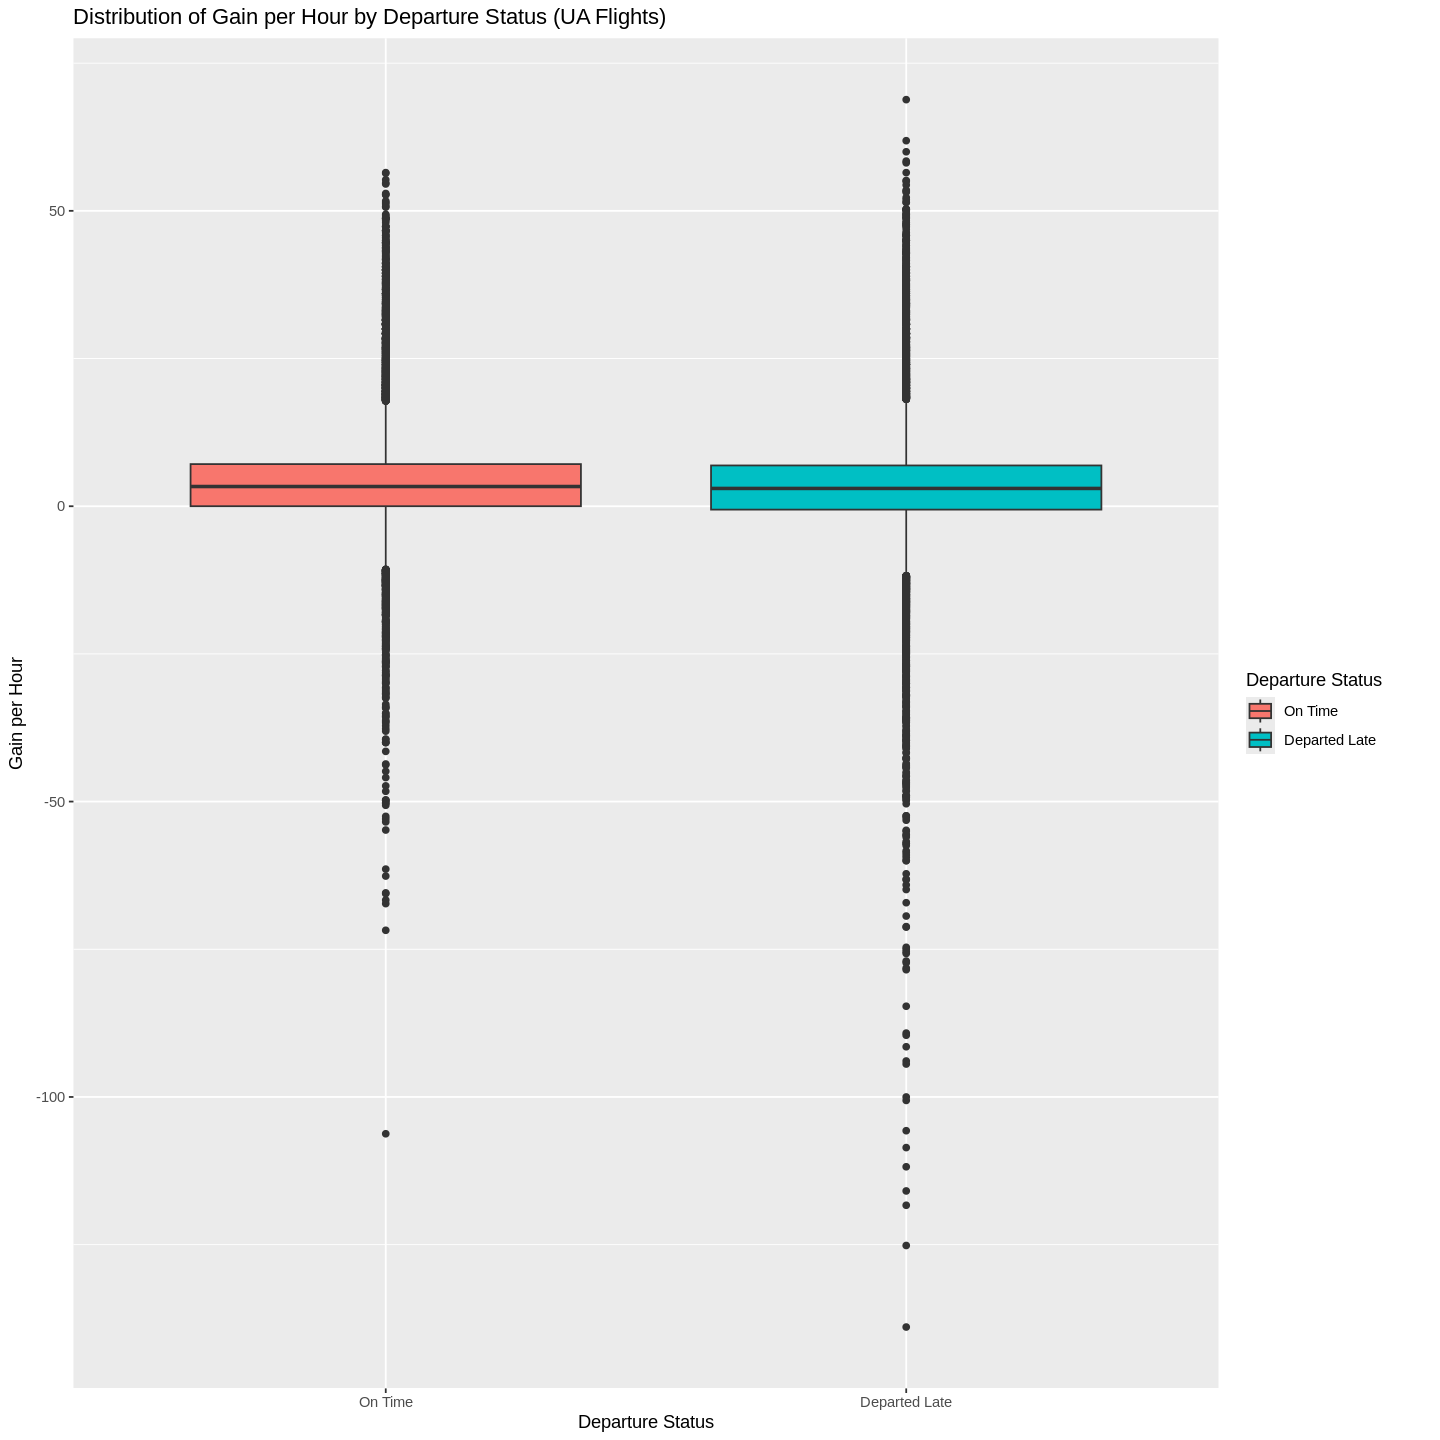

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 12)

ggplot(data = ua_flights_merged,
       aes(x = factor(departed_late),
           y = gain_per_hour,
           fill = factor(departed_late))) +
  geom_boxplot() +
  scale_x_discrete(
    labels = c("0" = "On Time", "1" = "Departed Late")
  ) +
  scale_fill_discrete(
    name = "Departure Status",
    labels = c("On Time", "Departed Late")
  ) +
  labs(
    title = "Distribution of Gain per Hour by Departure Status (UA Flights)",
    x = "Departure Status",
    y = "Gain per Hour"
  )

The boxplot compares the gain per hour for on-time flights and flights that departed late.
Both groups have a similar spread and look almost the same, but the center (the median) is a little higher for on-time flights.

This means on-time flights usually gain slightly more time per hour than late flights.
There are also a lot of outliers in both groups, which shows that some flights make a lot of time back, and some lose a lot, but that’s normal for flight data.

### Conducting Hypothesis Testing – Part 2

H₀: μ₁ = μ₂

H₁: μ₁ ≠ μ₂

where:

μ₁ – mean gain per hour for flights that departed more than 30 minutes late

μ₂ – mean gain per hour for flights that did not depart more than 30 minutes late

Perform Hypothesis Testing

In [ ]:
verylate_flights <- ua_flights %>% filter(departed_verylate == 1)
notvery_flights  <- ua_flights %>% filter(departed_verylate == 0)

In [ ]:
t.test(verylate_flights$gain_per_hour, notvery_flights$gain_per_hour,
       alternative = "two.sided",
       var.equal = FALSE)


	Welch Two Sample t-test

data:  verylate_flights$gain_per_hour and notvery_flights$gain_per_hour
t = -4.8323, df = 8835.1, p-value = 1.372e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8858401 -0.3745605
sample estimates:
mean of x mean of y 
 3.064527  3.694727 


We compared the gain per hour for flights that left more than 30 minutes late versus flights that did not.

The p-value is extremely small (1.37e-06), which means the difference between the two groups is real and not due to chance. So we reject the null hypothesis.

The average gain per hour for very late flights is about 3.06 minutes per hour, while flights that were not very late average about 3.69 minutes per hour.

This means flights that left more than 30 minutes late tend to gain less time per hour compared to flights that didn’t leave very late.

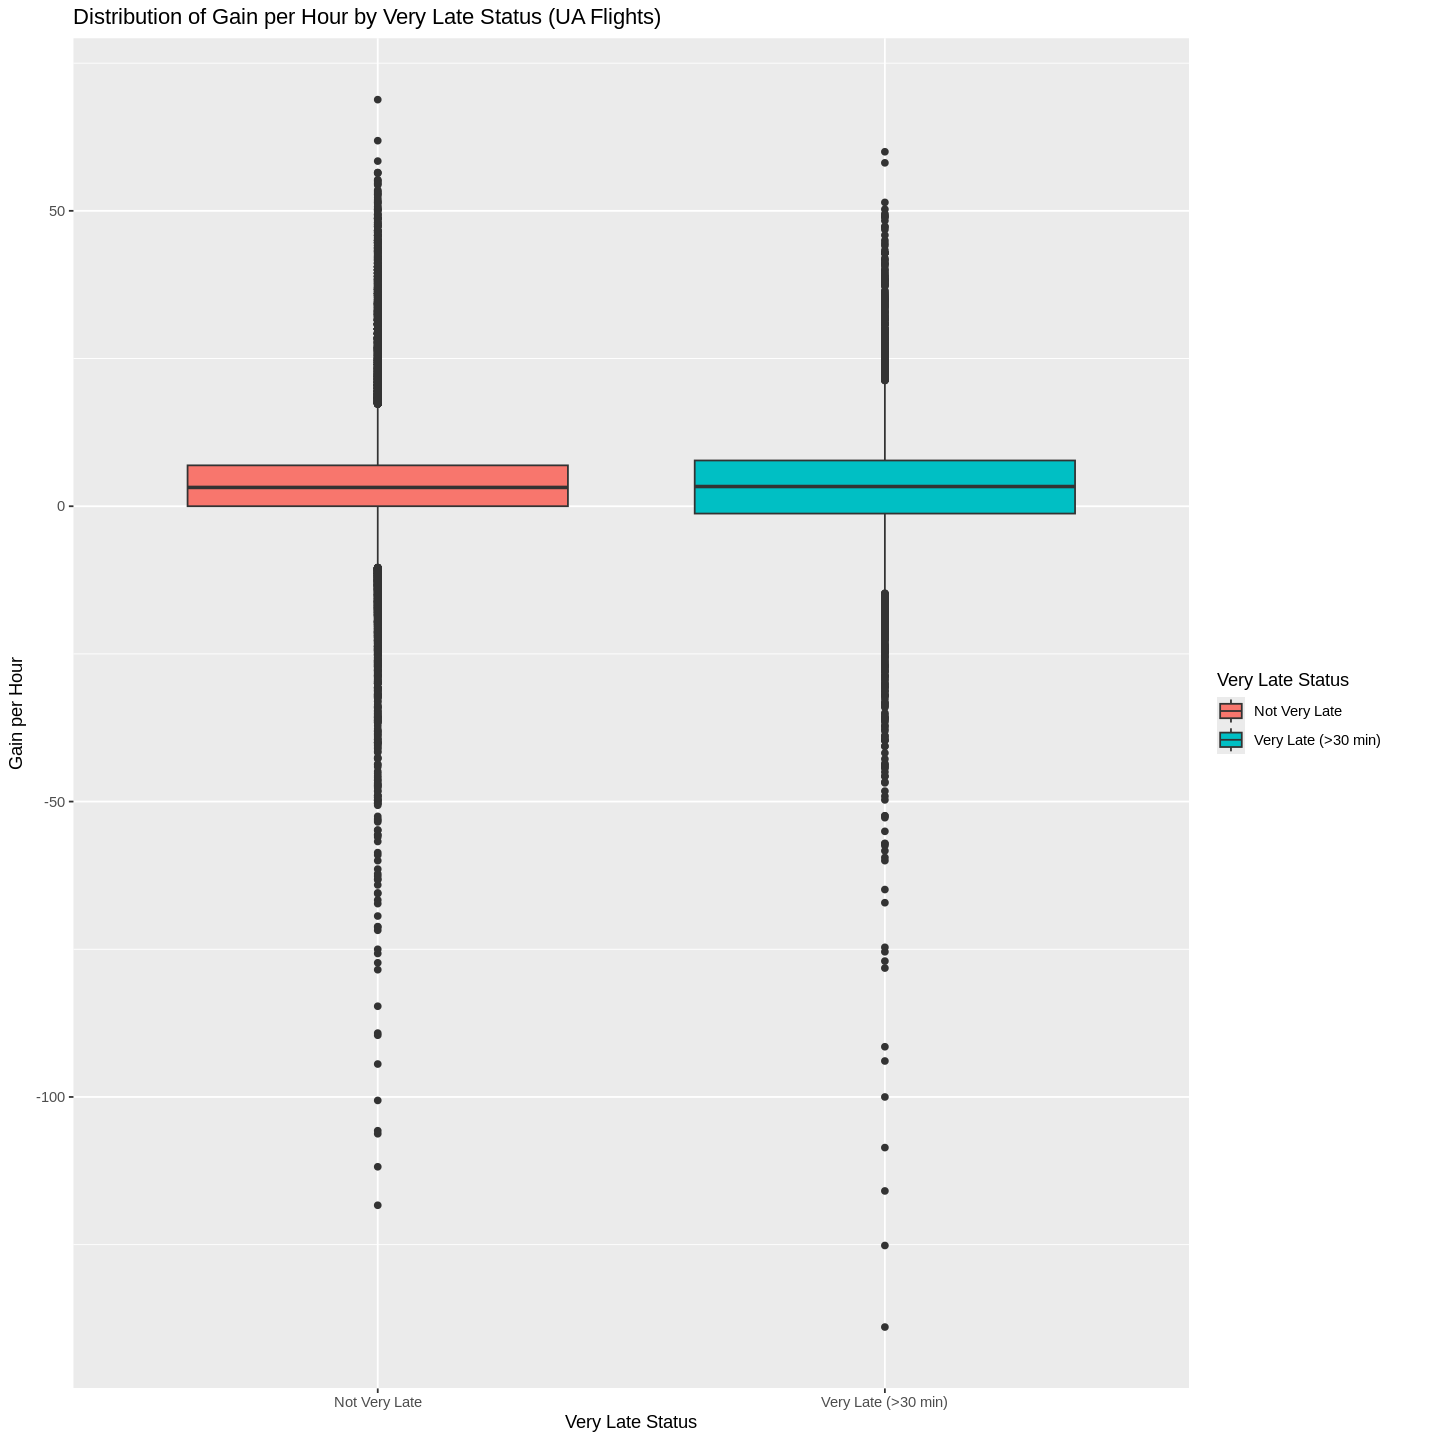

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 12)

ggplot(data = ua_flights_merged,
       aes(x = factor(departed_verylate),
           y = gain_per_hour,
           fill = factor(departed_verylate))) +
  geom_boxplot() +
  scale_x_discrete(
    labels = c("0" = "Not Very Late", "1" = "Very Late (>30 min)")
  ) +
  scale_fill_discrete(
    name = "Very Late Status",
    labels = c("Not Very Late", "Very Late (>30 min)")
  ) +
  labs(
    title = "Distribution of Gain per Hour by Very Late Status (UA Flights)",
    x = "Very Late Status",
    y = "Gain per Hour"
  )


This boxplot compares gain per hour for flights that were very late (more than 30 minutes) and flights that were not very late.

Both groups have a similar spread, but the center of the box (the median) is slightly higher for the “not very late” group. This means those flights usually recover a bit more time per hour compared to flights that left very late.

## Answering Q4

**Does the average gain per hour differ for longer flights vs shorter flights?**

#### (notes for me)

In [ ]:
# Show what we are working with
head(ua_flights_merged)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,departed_verylate,departed_ontime,long_flights,name,lat,lon,alt,tz,dst,tzone
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2013,1,1,517,515,2,830,819,11,UA,⋯,0,0,TRUE,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago
2013,1,1,533,529,4,850,830,20,UA,⋯,0,0,TRUE,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago
2013,1,1,554,558,-4,740,728,12,UA,⋯,0,1,FALSE,Chicago Ohare Intl,41.97860,-87.90484,668,-6,A,America/Chicago
2013,1,1,558,600,-2,924,917,7,UA,⋯,0,1,TRUE,Los Angeles Intl,33.94254,-118.40807,126,-8,A,America/Los_Angeles
2013,1,1,558,600,-2,923,937,-14,UA,⋯,0,1,TRUE,San Francisco Intl,37.61897,-122.37489,13,-8,A,America/Los_Angeles
2013,1,1,559,600,-1,854,902,-8,UA,⋯,0,1,TRUE,Mc Carran Intl,36.08006,-115.15225,2141,-8,A,America/Los_Angeles


In [ ]:
colnames(ua_flights_merged)

[1] "year"              "month"             "day"              
 [4] "dep_time"          "sched_dep_time"    "dep_delay"        
 [7] "arr_time"          "sched_arr_time"    "arr_delay"        
[10] "carrier"           "flight"            "tailnum"          
[13] "origin"            "dest"              "air_time"         
[16] "distance"          "hour"              "minute"           
[19] "time_hour"         "net_gain"          "gain_per_hour"    
[22] "departed_late"     "departed_verylate" "departed_ontime"  
[25] "long_flights"      "name"              "lat"              
[28] "lon"               "alt"               "tz"               
[31] "dst"               "tzone"

Datasets we are using from **nyc13package**:
- flights
- airlines
- airports

Original **flights** variables:
- `year`	  Year of flight (2013)
- `month`	Month of departure
- `day`	Day of month
- `dep_time`	Actual departure time (HHMM or NA)
- `sched_dep_time`	Scheduled departure time
- `dep_delay`	Departure delay in minutes (negative = early)
- `arr_time`	Actual arrival time
- `sched_arr_time`	Scheduled arrival time
- `arr_delay`	Arrival delay in minutes
- `carrier`	Airline code (UA, AA, DL)
- `flight`	Flight number
- `origin`	Origin airport (JFK/LGA/EWR)
- `dest`	Destination airport code
- `air_time`	Minutes spent in the air
- `distance`	Distance between airports in miles

Created variables in **ua_flights** -> and now in **ua_flights_merged** (final dataset)

- `net_gain`
- `gain_per_hour`
- `departed_late`
- `departed_very_late`
- `departed_ontime`
- `long_flights`

#### Step 1: Declare the Hypothesis Tests

We tested whether the average gain per hour differs:

  - **Null Hypothesis (Ho)**:
    
      - μlong ​= μshort​
      - Mean GPH of Long Flights == Mean GPH of Short Flights

  - **Alternative Hypothesis (Ha)**:
  
      - μlong​  != μshort​
      - Mean GPH of Long Flights != Mean GPH of Short Flights

#### Step 2: To address this question, we first calculated the **gain_per_hour** for each **flight**.



This was done in the cleaning and prepping part of this process before the merge.

     gain_per_hour = (gain_per_hour = net_gain / (air_time / 60))

#### Step 3: Find the actual **median flight time**, which served as the cutoff between:

  - Long flights: air_time ≥ median=197

  - Short flights: air_time < median=197


In [ ]:
# Value of the Median Airtime
median_airtime <- median(ua_flights_merged$air_time, na.rm = TRUE)
cat("Median Air time is:", median_airtime)


Median Air time is: 197

##### Here is a visual to show the **distribution of air_time** by minutes:

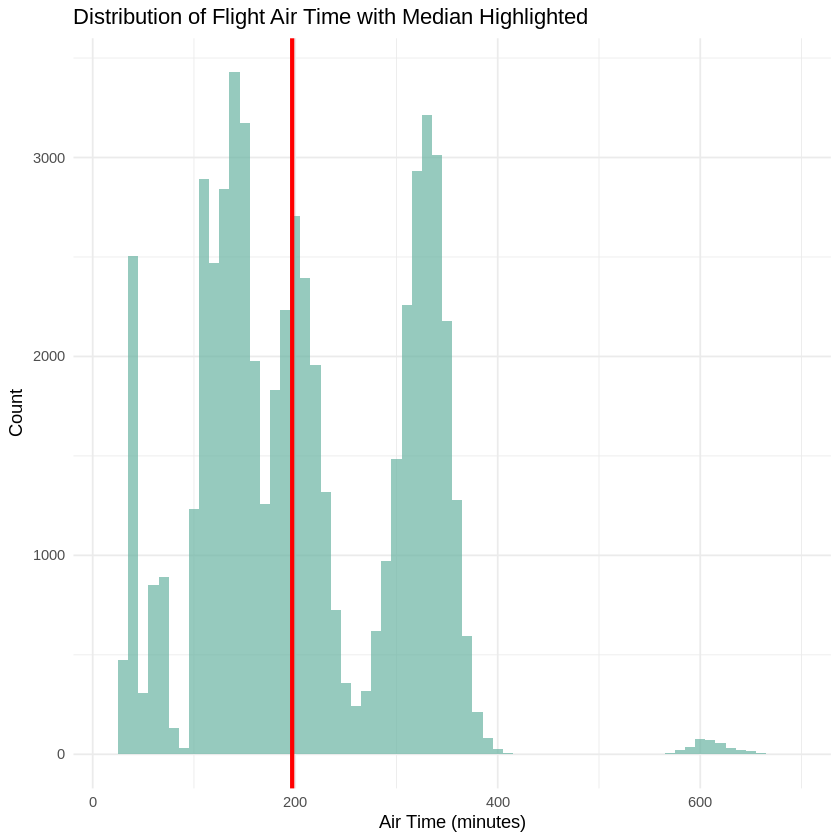

In [ ]:
# Plot the Median Line for air_time
ggplot(ua_flights_merged, aes(x = air_time)) +
  geom_histogram(binwidth = 10, fill = "#69b3a2", alpha = 0.7) +
  geom_vline(xintercept = median_airtime, color = "red", size = 1.2) +
  labs(
    title = "Distribution of Flight Air Time with Median Highlighted",
    x = "Air Time (minutes)",
    y = "Count"
  ) +
  theme_minimal()


Note: We used the **median, not the mean,** to split long vs short flights becuase the distribution of `air_time` is strongly skewed with a long tail of **very long flights**. When the ditribution is NOT normally distributed, using the mean would give a cutoff that **overstates what an average flight length is** becuase of the skew. The median creates a balanced split!

#### Step 4: Create a **new split** for Long vs Short flights using the **actual median air_time value**

Done in the cleaning process, we filtered for `long_flights` by displaying TRUE/FALSE if the **air_time** of that flight was greater-than the median value.

      #DEFINE LONG FLIGHT COLUMN USING MEDIAN AIRTIME AS THHRESHOLD        
      long_flights = air_time>median(air_time, na.rm=TRUE)
  

In [ ]:
# Showcase Long vs Short flights based on Median
ua_flights_merged$long_flights

[1]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE
   [13]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE
   [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
   [37] FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
   [49] FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE
   [61]  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE
   [73] FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE
   [85]  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE
   [97]  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE
  [121]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE
  [133]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE
  [145]  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE
  [157] FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
  [169] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
  [181]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE
  [193]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
  [205]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE
  [217] FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE
  [229]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE
  [241]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE
  [253]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE
  [265]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277]  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
  [289]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE
  [301]  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
  [313] FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE
  [325]  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
  [337]  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
  [349]  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE
  [361] FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE
  [373] FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE
  [385] FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
  [397]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE
  [409]  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
  [421]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE
  [433] FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE
  [445]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE
  [457]  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [469]  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
  [481] FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
  [493] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
  [505]  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE
  [517] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
  [529] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE
  [541] FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
  [553] FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
  [565] FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE
  [577] FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE
  [589]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE
  [6

**(Optional) New Split** using the `median_airtime` value - `long_flight` is >= median air_time=197

In [ ]:
ua_flights_merged <- ua_flights_merged %>%
  mutate(
    long_flight = air_time >= median_airtime
  )
head(ua_flights_merged)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,departed_ontime,long_flights,name,lat,lon,alt,tz,dst,tzone,long_flight
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>
2013,1,1,517,515,2,830,819,11,UA,⋯,0,TRUE,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago,TRUE
2013,1,1,533,529,4,850,830,20,UA,⋯,0,TRUE,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago,TRUE
2013,1,1,554,558,-4,740,728,12,UA,⋯,1,FALSE,Chicago Ohare Intl,41.97860,-87.90484,668,-6,A,America/Chicago,FALSE
2013,1,1,558,600,-2,924,917,7,UA,⋯,1,TRUE,Los Angeles Intl,33.94254,-118.40807,126,-8,A,America/Los_Angeles,TRUE
2013,1,1,558,600,-2,923,937,-14,UA,⋯,1,TRUE,San Francisco Intl,37.61897,-122.37489,13,-8,A,America/Los_Angeles,TRUE
2013,1,1,559,600,-1,854,902,-8,UA,⋯,1,TRUE,Mc Carran Intl,36.08006,-115.15225,2141,-8,A,America/Los_Angeles,TRUE


#### Step 5: Compute the mean gain_per_hour by **Long vs Short** flights - `mean_gph`



In [ ]:
group_means <- ua_flights_merged %>%
  group_by(long_flight) %>%
  summarise(
    mean_gph = mean(gain_per_hour, na.rm = TRUE),
    n = n()
  )
group_means

long_flight,mean_gph,n
<lgl>,<dbl>,<int>
FALSE,5.599280,28772
TRUE,1.641786,29010


We can see that the **mean gain per hour** for:

  - Long Flights (TRUE) = 1.64 average gained minutes
  - Short Flights (FALSE) = 5.59 average gained minutes

We can observe that:

  - Shorter flights tend to make up *more minutes per hour*, with less flights departed.

  - Longer flights tend to have *smaller gains per hour*, with more flights departed.
	​

**Visual:** <br> Below is a density plot that shows the **difference in the shape** of the gain-per-hour distribution for long vs. short flights.

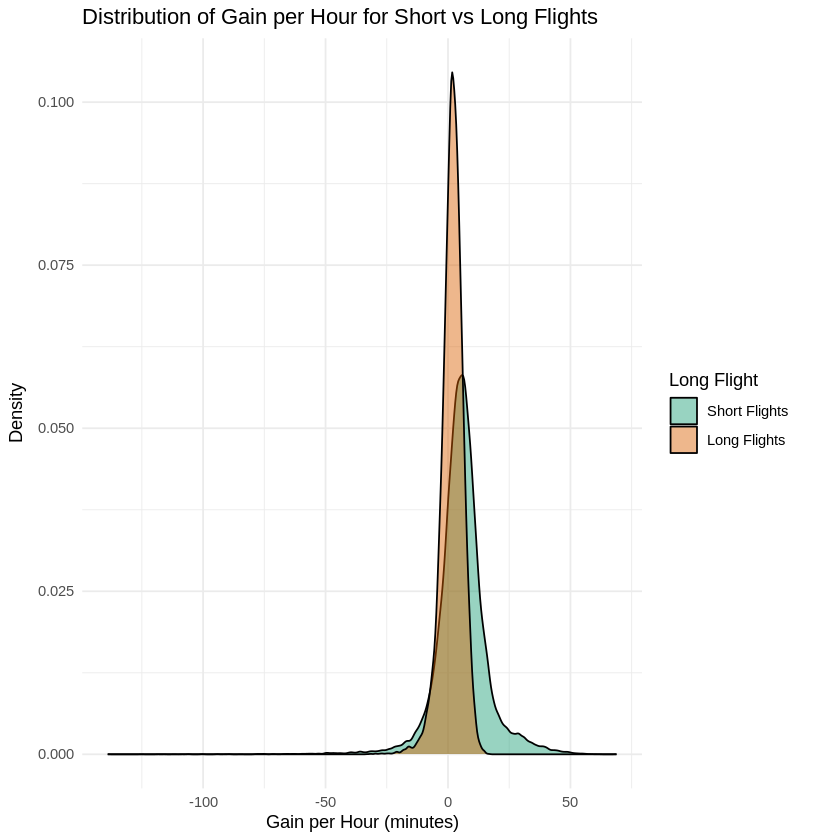

In [ ]:
library(ggplot2)

ggplot(flights2, aes(x = gain_per_hour, fill = long_flight)) +
  geom_density(alpha = 0.45) +
  labs(
    title = "Distribution of Gain per Hour for Short vs Long Flights",
    x = "Gain per Hour (minutes)",
    y = "Density",
    fill = "Long Flight"
  ) +
  scale_fill_manual(values = c("FALSE" = "#1b9e77", "TRUE" = "#d95f02"),
                    labels = c("Short Flights", "Long Flights")) +
  theme_minimal()

**Plot Observation:**
  - Short flights generally have higher gain-per-hour
  - Long flights cluster lower
  - Overlapping density shapes

#### Step 6: Compute + Analyze the `t.test()` results


The `t.test()` compares the two groups' **mean gain per hour**.

In [ ]:
t_test_results <- t.test(
  gain_per_hour ~ long_flight,
  data = ua_flights_merged,
  alternative = "two.sided",
  conf.level = 0.95
)
t_test_results


	Welch Two Sample t-test

data:  gain_per_hour by long_flight
t = 57.445, df = 38303, p-value < 2.2e-16
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 3.822464 4.092525
sample estimates:
mean in group FALSE  mean in group TRUE 
           5.599280            1.641786 


The output provides:
  
  - t-statistic = 57.445
  - p-value < 2.2e-16
  - 95% confidence interval for the difference = [3.822, 4.0925]
  - Mean GPH for Short Flights = 5.59 mins
  - Mean GPH for Long Flights = 1.64 mins

**Observation**:

Group Means
  - Short flights (FALSE): mean gain per hour = 5.599 minutes
  - Long flights (TRUE): mean gain per hour = 1.642 minutes

**Summary:** <br>
Short flights gain much more time per hour than long flights — about 4 minutes more per hour, on average.Short flights gain much more time per hour than long flights — about 4 minutes more per hour, on average.

#### Step 7: Interpret CI

The t-test also includes a 95% CI for the difference in means
- μlong ​− μshort​

- Mean GPH of Long Flights - Mean GPH of Short Flights

**Observation:** <br>The 95% confidence interval for the true difference in mean gain per hour is:

[ 3.822, 4.093 ]

**Summary:** <br>
We are 95% confident that short flights gain between 3.8 and 4.1 more minutes per hour than long flights.

Because the entire CI is positive, the difference is statistically meaningful.

#### Step 8: Hypothesis Test Conclusions

...To determine Statisitcal Conclusion:

  - If **p-value < 0.05**, we reject H₀ and conclude that **average gain per hour is significantly different** between long and short flights.

  - If **p-value ≥ 0.05**, we fail to reject H₀ and conclude that there **is no strong evidence of a difference**.

**Our Hypothesis Tests:** <br>

  - Null Hypothesis (Ho):
    - Mean GPH of Long Flights == Mean GPH of Short Flights

  - Alternative Hypothesis (Ha):
    - Mean GPH of Long Flights != Mean GPH of Short Flights


**Observation:**
  - **t = 57.445**
  - **p-value < 2.2e-16**
  

**Summary:** <br>
Since the **p<0.05** we **Reject the null hypothesis**: <br>
There is extremely strong evidence that short flights and long flights differ in their average gain per hour.

### CONCLUSION SUMMARY

#### Group Means

  - **Short flights** (FALSE): mean gain per hour = 5.599 minutes

  - **Long flights** (TRUE): mean gain per hour = 1.642 minutes


Short flights gain much more time per hour than long flights — about 4 minutes more per hour, on average.

#### Hypothesis Tests

Null Hypothesis (Ho):

    Mean GPH of Long Flights == Mean GPH of Short Flights

Alternative Hypothesis (Ha):

    Mean GPH of Long Flights != Mean GPH of Short Flights

We found that:
  - **t = 57.445**
  - **p-value < 2.2e-16**

Since the **p<0.05** we **Reject the null hypothesis**: <br>
There is extremely strong evidence that short flights and long flights differ in their average gain per hour.

#### CI

The 95% confidence interval for the true difference in mean gain per hour is:

**[ 3.822, 4.093 ]**

We are 95% confident that short flights gain between 3.8 and 4.1 more minutes per hour than long flights.

Because the entire CI is positive, the difference is statistically meaningful.